 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [57]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [58]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [59]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [60]:
# Drop nulls
# YOUR CODE HERE
whale_df = whale_df.dropna()
# Check that nulls have been dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [61]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
algo_df.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [62]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [63]:
# Drop nulls
# YOUR CODE HERE
algo_df = algo_df.dropna()
# Check that nulls have been dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [64]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

sp500_df = sp500_df.sort_index()
sp500_df.head(5)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [65]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [66]:
# Fix Data Types
# YOUR CODE HERE
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [67]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [68]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.dropna()
# Check that nulls have been dropped
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [69]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.rename(columns={
    "Close": "S&P 500"
})

sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [70]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
daily_returns = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Portfolio Analysis
In this section, you will calculate and visualize performance and risk metrics for the portfolios.




## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:xlabel='Date'>

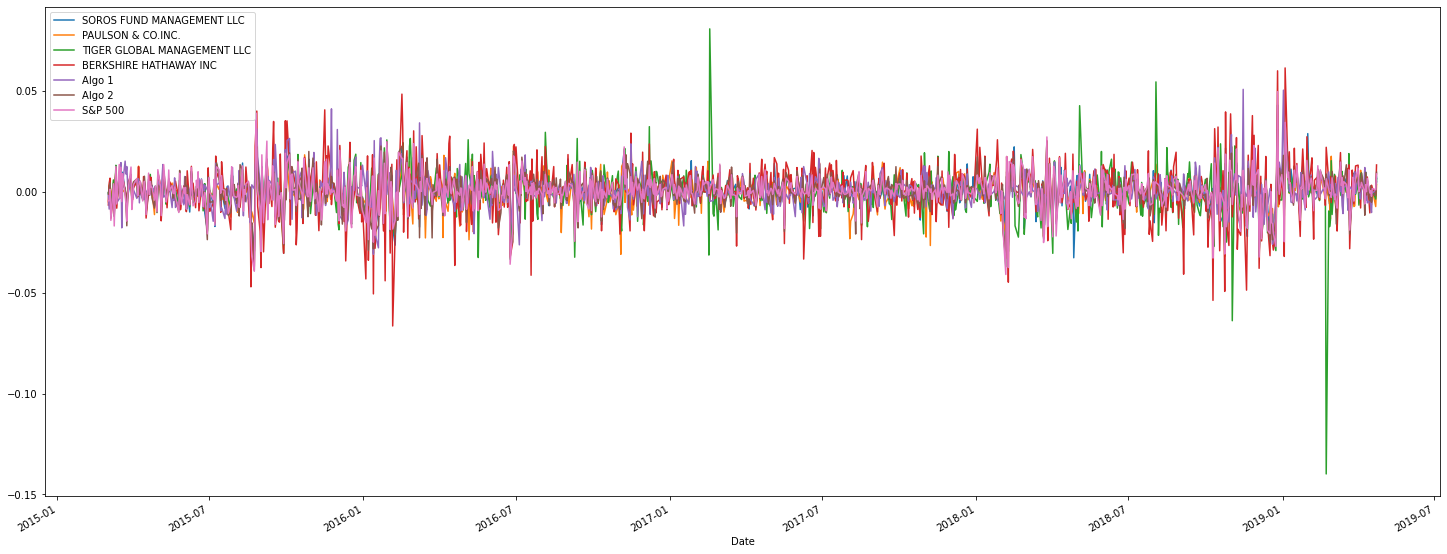

In [71]:
# Plot daily returns
# YOUR CODE HERE
daily_returns.plot(figsize=(25,10))

<AxesSubplot:xlabel='Date'>

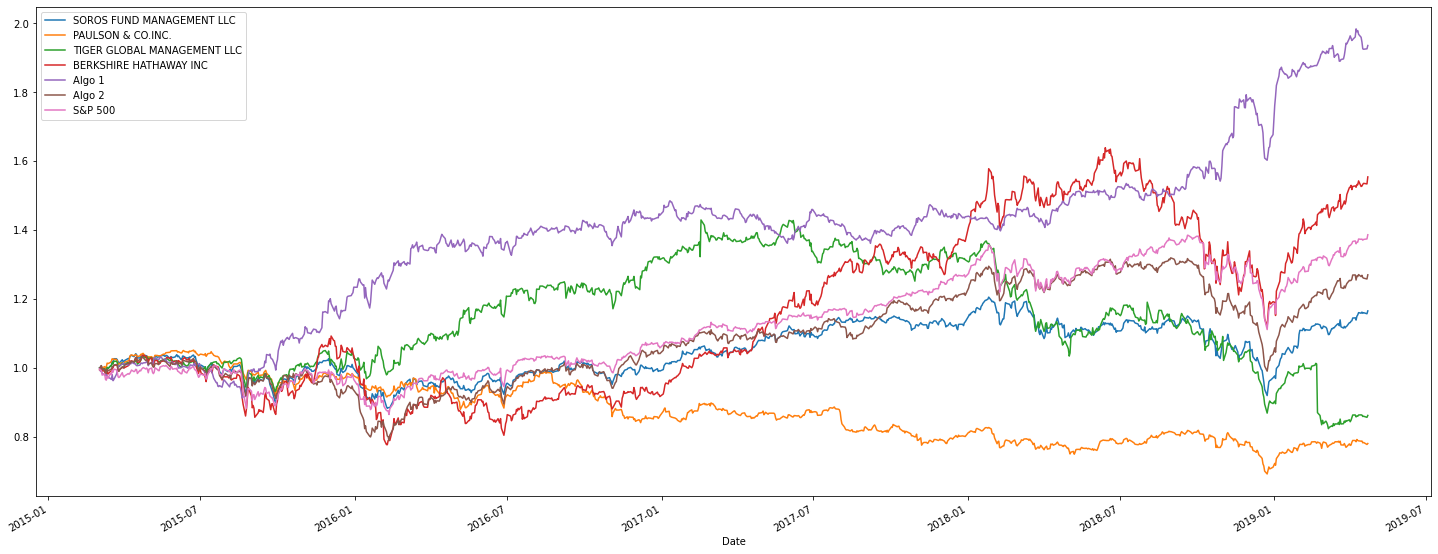

In [72]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.plot(figsize=(25,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

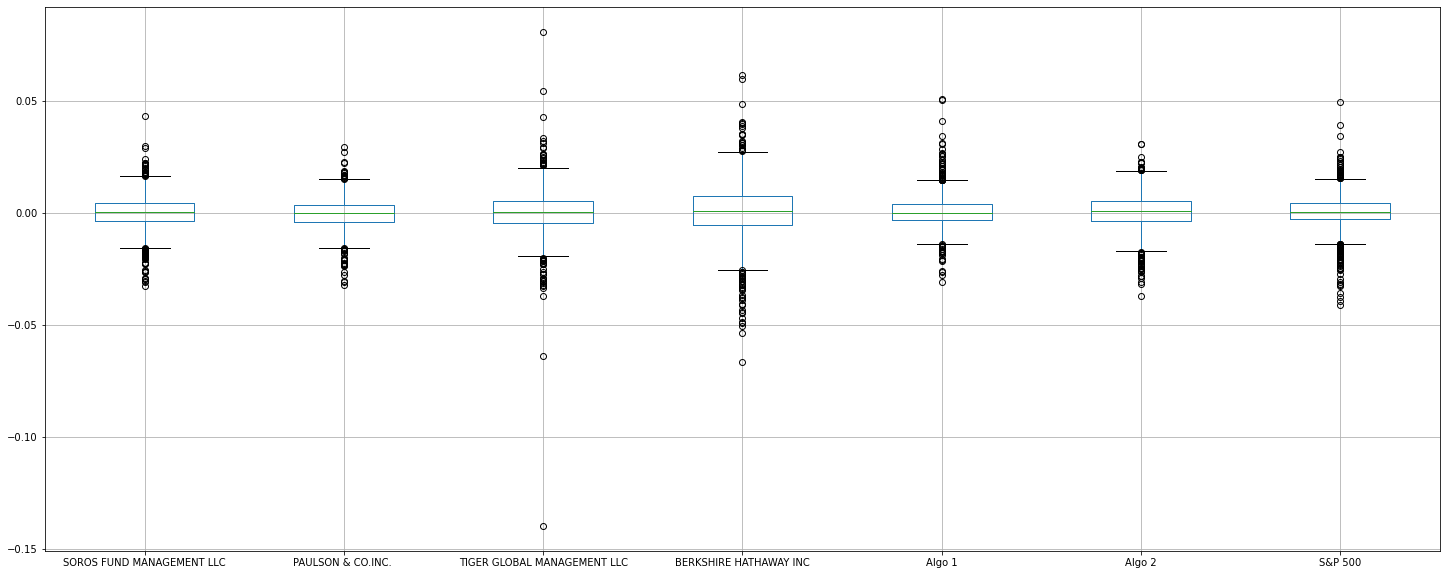

In [73]:
# Box plot to visually show risk
# YOUR CODE HERE
daily_returns.boxplot(figsize=(25,10))

In [74]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = daily_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [75]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskier = daily_std[daily_std > daily_std["S&P 500"]]
print(riskier)

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [76]:
less_risky = daily_std[daily_std < daily_std["S&P 500"]]
print(less_risky)

SOROS FUND MANAGEMENT LLC    0.007895
PAULSON & CO.INC.            0.007023
Algo 1                       0.007620
Algo 2                       0.008342
dtype: float64


In [77]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE 
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

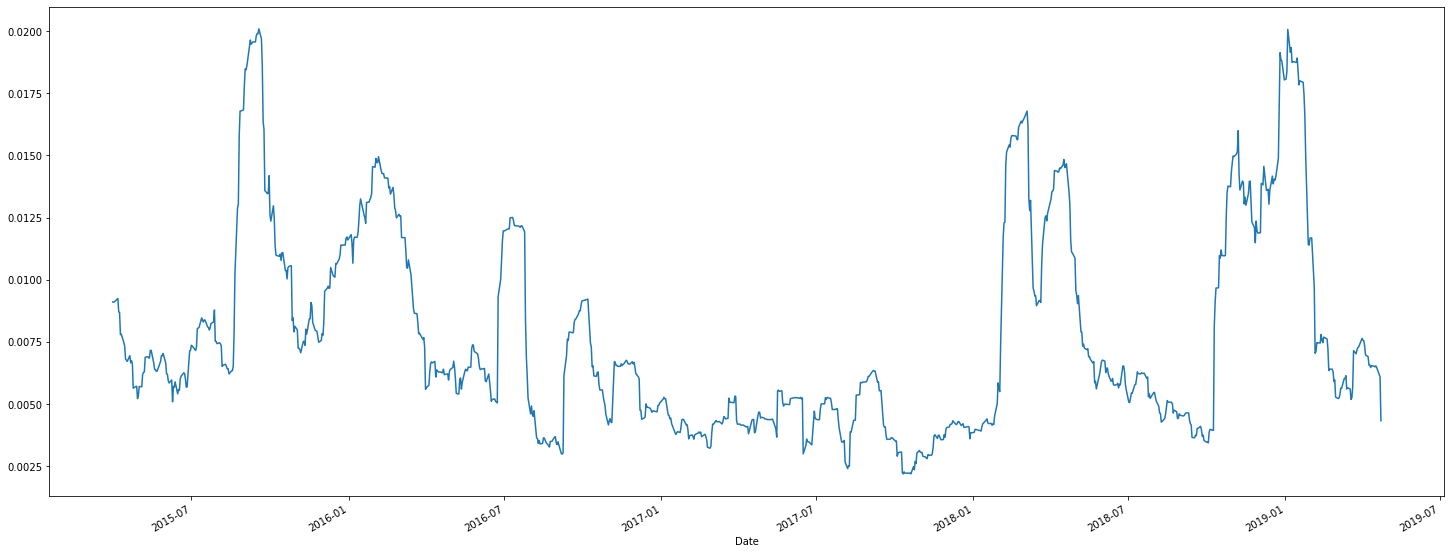

In [78]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
daily_returns["S&P 500"].rolling(window=21).std().plot(figsize=(25,10))

In [79]:
# Construct a correlation table
# YOUR CODE HERE
correlation = daily_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

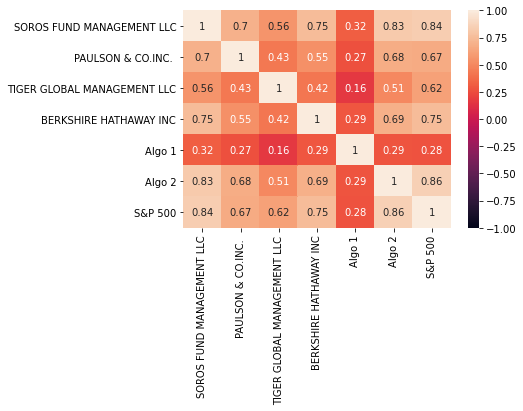

In [80]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True,)

In [81]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

# Beta = covariance / variance

# Calculate covariance of all daily returns of Berkshire Hathaway vs. S&P 500

covariance = daily_returns['BERKSHIRE HATHAWAY INC'].cov(daily_returns['S&P 500'])
covariance

8.302834941861689e-05

In [82]:
variance = daily_returns['S&P 500'].var()
variance

7.316632424648712e-05

In [83]:
bh_beta = covariance / variance
bh_beta

1.1347891297491723

<AxesSubplot:xlabel='Date'>

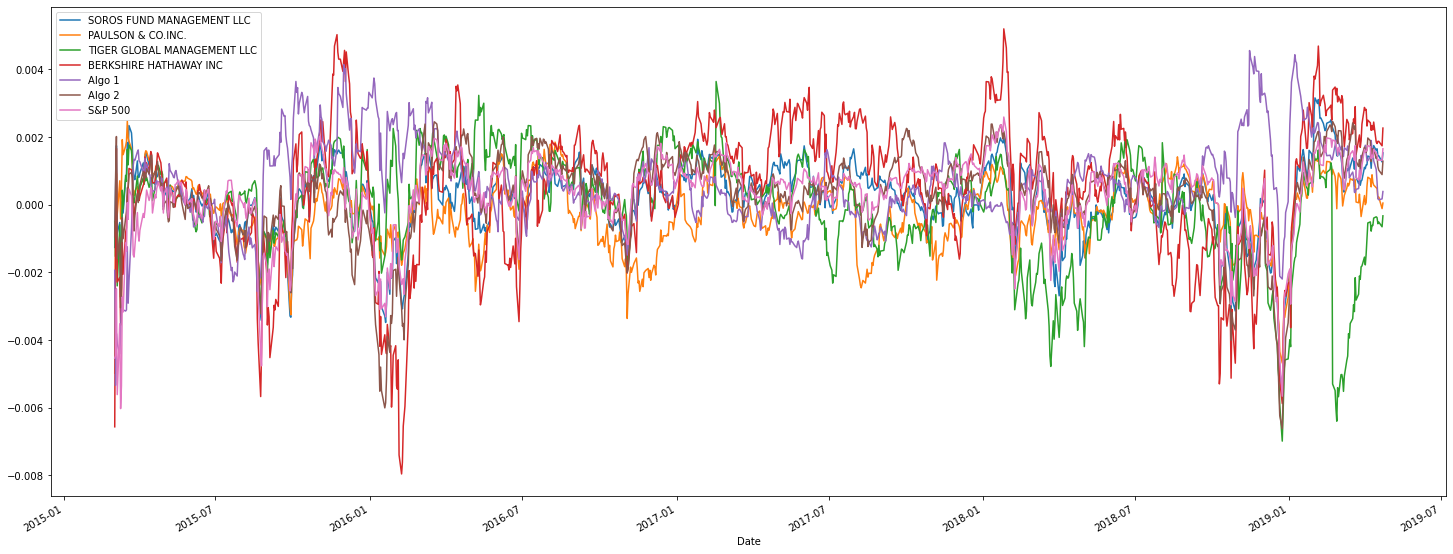

In [84]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
daily_returns.ewm(com=21).mean()
daily_returns.ewm(com=21).mean().plot(figsize=(25,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [85]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

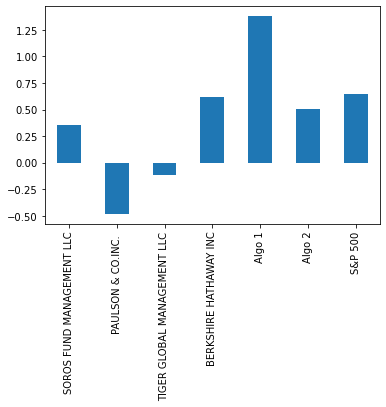

In [86]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

A higher Sharpe ratio indicates better returns relative to the amount of risk. 

Algo 1 has a higher Sharpe ratio than the whales and S&P 500, so it would have outperformed both the whales and 'the market.'  

Algo 2 looks like it did outperform a few of the whales, including SOROS FUND MANAGEMENT LLC, PAULSON & CO INC., and TIGER GLOBAL MANAGEMENT LLC.  However, it's Sharpe ratio was less than that of BERKSHIRE HATHAWAY INC and S&P 500, so it would have outperformed some of the whales, but not BERKSHIRE HATHAWAY INC or 'the market.'

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [87]:
# Read the first stock
# YOUR CODE HERE
aapl_historical_csv = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_historical_csv, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)

aapl_df.drop(columns=['Symbol'], inplace=True)

aapl_df = aapl_df.rename(columns={
    "NOCP": "AAPL"
})

aapl_daily_returns = aapl_df.pct_change()
aapl_daily_returns.head()

,AAPL
Trade DATE,
2019-05-09,NaN
2019-05-08,0.010861
2019-05-07,-0.000197
2019-05-06,0.027704
2019-05-03,0.015685


In [88]:
aapl_df = aapl_df.sort_index()
aapl_df.head(5)

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [89]:
# Read the second stock
# YOUR CODE HERE
cost_historical_csv = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_historical_csv, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)

cost_df.drop(columns=['Symbol'], inplace=True)

cost_df = cost_df.rename(columns={
    "NOCP": "COST"
})

cost_daily_returns = cost_df.pct_change()
cost_daily_returns.head()

,COST
Trade DATE,
2019-05-09,NaN
2019-05-08,-0.008749
2019-05-07,-0.004806
2019-05-06,0.016862
2019-05-03,0.001597


In [90]:
cost_df = cost_df.sort_index()
cost_df.head(5)

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [91]:
# Read the third stock
# YOUR CODE HERE
goog_historical_csv = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_historical_csv,parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)

goog_df.drop(columns=['Symbol'], inplace=True)

goog_df = goog_df.rename(columns={
    "NOCP": "GOOG"
})

goog_daily_returns = goog_df.pct_change()
goog_daily_returns.head()

,GOOG
Trade DATE,
2019-05-09,NaN
2019-05-08,0.003347
2019-05-07,0.006714
2019-05-06,0.013023
2019-05-03,-0.003355


In [92]:
goog_df = goog_df.sort_index()
goog_df.head(5)

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [93]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
portfolio_daily_returns = pd.concat([aapl_daily_returns,cost_daily_returns,goog_daily_returns], axis="columns", join="inner")
portfolio_daily_returns.head(5)

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355


In [94]:
# Reset the index
# YOUR CODE HERE
portfolio_daily_returns.reset_index().head(5)

,Trade DATE,AAPL,COST,GOOG
0,2019-05-09,NaN,NaN,NaN
1,2019-05-08,0.010861,-0.008749,0.003347
2,2019-05-07,-0.000197,-0.004806,0.006714
3,2019-05-06,0.027704,0.016862,0.013023
4,2019-05-03,0.015685,0.001597,-0.003355


In [95]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
# did this above

In [96]:
# Drop Nulls
# YOUR CODE HERE
portfolio_daily_returns = portfolio_daily_returns.dropna()
portfolio_daily_returns.isnull().sum()

AAPL    0
COST    0
GOOG    0
dtype: int64

In [97]:
portfolio_daily_returns.sort_index().head(5)

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,0.002339,-0.000613,-0.001763
2018-05-14,0.009172,0.002046,0.019431
2018-05-15,-0.009246,-0.016255,-0.002348
2018-05-16,0.006364,-0.004459,0.002948
2018-05-17,0.003650,0.003217,0.011469


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [98]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
weighted_portfolio_daily_returns = portfolio_daily_returns.dot (weights)

weighted_portfolio_daily_returns = weighted_portfolio_daily_returns.sort_index()

weighted_portfolio_daily_returns.head(5)

Trade DATE
2018-05-11   -0.000012
2018-05-14    0.010216
2018-05-15   -0.009283
2018-05-16    0.001618
2018-05-17    0.006112
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [99]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_daily_returns_df = pd.concat([daily_returns,portfolio_daily_returns], axis="columns", join="inner")
all_daily_returns_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,0.002339,-0.000613,-0.001763
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.009172,0.002046,0.019431
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009246,-0.016255,-0.002348
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.006364,-0.004459,0.002948
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.003650,0.003217,0.011469


In [100]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_daily_returns_df.dropna(inplace=True)
print(all_daily_returns_df.head(5))

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2018-05-11                  -0.004717            0.000982   
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2018-05-11                     0.002624               -0.004125  0.000358   
2018-05-14                     0.000000                0.000000  0.000915   
2018-05-15                    -0.003189               -0.014606 -0.001135   
2018-05-16                     0.005480                0.004310 -0.002326   
2018-05-17                    -0.006267               -0.005140 -0.006949   

              Algo 2   S&P 500      AAPL      COST      GOOG  
2018-05-11  0.000281  0.001708  0.002339 -0.000613 -0.001763  
2018-05-14  0.001635  0.000884  0.009172  0.

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [101]:
# Risk
# YOUR CODE HERE
all_risk = all_daily_returns_df.std()
print(all_risk.sort_values())

PAULSON & CO.INC.              0.007338
Algo 1                         0.008405
Algo 2                         0.008773
SOROS FUND MANAGEMENT LLC      0.009226
S&P 500                        0.009559
COST                           0.013601
TIGER GLOBAL MANAGEMENT LLC    0.014619
BERKSHIRE HATHAWAY INC         0.015539
GOOG                           0.016059
AAPL                           0.018914
dtype: float64


<AxesSubplot:>

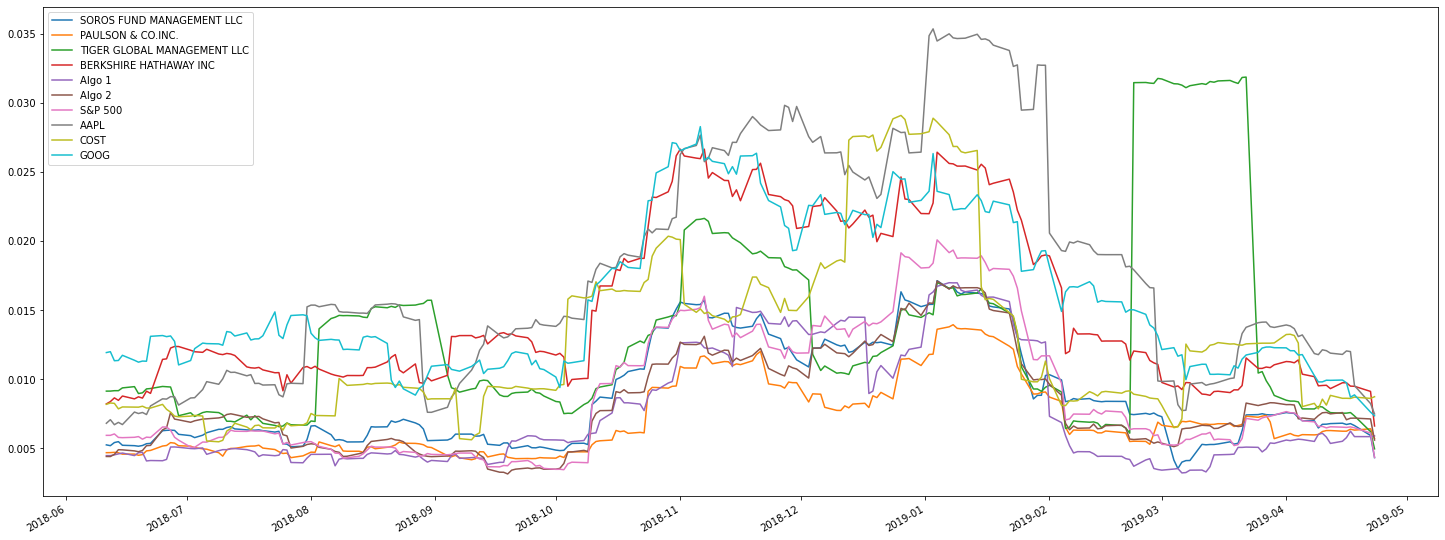

In [102]:
# Rolling
# YOUR CODE HERE
all_daily_returns_df.rolling(window=21).std().plot(figsize=(25,10))

In [103]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
new_sharpe_ratios = (all_daily_returns_df.mean() * 252) / (all_daily_returns_df.std() * np.sqrt(252))
new_sharpe_ratios.sort_values()

COST                          -1.052624
TIGER GLOBAL MANAGEMENT LLC   -1.019946
GOOG                          -0.430354
AAPL                          -0.183161
Algo 2                         0.082577
BERKSHIRE HATHAWAY INC         0.141691
PAULSON & CO.INC.              0.267115
SOROS FUND MANAGEMENT LLC      0.395449
S&P 500                        0.595486
Algo 1                         2.034208
dtype: float64

<AxesSubplot:>

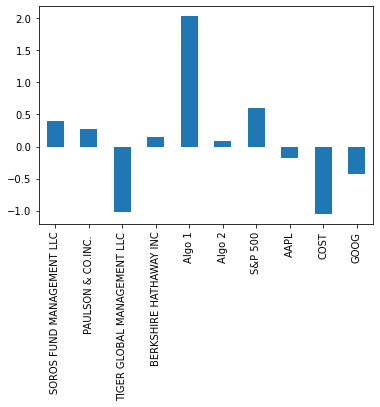

In [104]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
new_sharpe_ratios.plot.bar()

In [105]:
# Create a correlation analysis
# YOUR CODE HERE
new_correlation = all_daily_returns_df.corr()
new_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
SOROS FUND MANAGEMENT LLC,1.000000,0.791191,0.477722,0.816670,0.337809,0.862258,0.876089,0.025584,0.023169,0.104055
PAULSON & CO.INC.,0.791191,1.000000,0.485421,0.650499,0.361243,0.783646,0.766696,0.036797,-0.061685,0.073187
TIGER GLOBAL MANAGEMENT LLC,0.477722,0.485421,1.000000,0.325080,0.114449,0.409472,0.481095,0.012910,0.052597,0.030462
BERKSHIRE HATHAWAY INC,0.816670,0.650499,0.325080,1.000000,0.327043,0.782646,0.851968,-0.026454,-0.017662,0.063062
Algo 1,0.337809,0.361243,0.114449,0.327043,1.000000,0.365496,0.289290,0.122513,-0.017724,0.054127
Algo 2,0.862258,0.783646,0.409472,0.782646,0.365496,1.000000,0.875699,0.034272,-0.062527,0.112318
S&P 500,0.876089,0.766696,0.481095,0.851968,0.289290,0.875699,1.000000,0.029646,0.025255,0.120870
AAPL,0.025584,0.036797,0.012910,-0.026454,0.122513,0.034272,0.029646,1.000000,0.432154,0.687005
COST,0.023169,-0.061685,0.052597,-0.017662,-0.017724,-0.062527,0.025255,0.432154,1.000000,0.401170
GOOG,0.104055,0.073187,0.030462,0.063062,0.054127,0.112318,0.120870,0.687005,0.401170,1.000000


<AxesSubplot:>

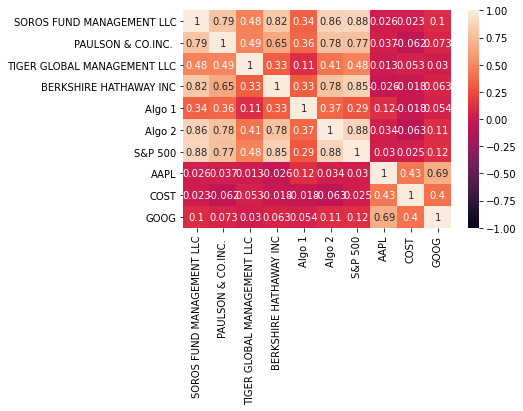

In [106]:
sns.heatmap(new_correlation, vmin=-1, vmax=1, annot=True,)

In [107]:
# Beta (AAPL vs S&P 500)
# YOUR CODE HERE
aapl_covariance = all_daily_returns_df['AAPL'].cov(all_daily_returns_df['S&P 500'])
aapl_variance = all_daily_returns_df['S&P 500'].var()
aapl_beta = aapl_covariance / aapl_variance
aapl_beta

0.058660560123722054

In [108]:
# Beta (COST vs S&P 500)
cost_covariance = all_daily_returns_df['COST'].cov(all_daily_returns_df['S&P 500'])
cost_variance = all_daily_returns_df['S&P 500'].var()
cost_beta = cost_covariance / cost_variance
cost_beta

0.0359362502262466

In [109]:
# Beta (GOOG vs S&P 500)
goog_covariance = all_daily_returns_df['GOOG'].cov(all_daily_returns_df['S&P 500'])
goog_variance = all_daily_returns_df['S&P 500'].var()
goog_beta = goog_covariance / goog_variance
goog_beta


0.20307241100825188